In [8]:
import math
import random
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm



In [9]:
def CLT_std_norm_rand():
    random_nums = [random.uniform(0, 1) for x in range(12)] 
    std_norm_rand = sum(random_nums) - 6
    return std_norm_rand

def gaussian_data_generator(mean, var, method=0):
    if method==0:
        std_norm_rand = CLT_std_norm_rand()
    norm_rand = mean + (std_norm_rand * var**(1/2))
    return norm_rand

def polynomial_linear_data_generator(num_basis, a, w, x):
    # x = [random.uniform(-10, 10) * 20 for x in range(num_basis)]
    # x[0] = 1
    e = gaussian_data_generator(0, a)
    y = np.dot(x, w) + e
    return y

In [10]:
class Estimator:

    def __init__(self):
        self.num_data = 0
        self.mean = 0
        self.var = 0

    def update(self, x):
        self.num_data += 1
        if self.num_data == 1:
            self.mean = x
            self.var = 0.0
        else:
            self.mean = self.mean + (x - self.mean) / self.num_data
            self.var = self.var + (x - self.mean)**2 / self.num_data - self.var / (self.num_data - 1)

    def estimate(self):
        return self.mean, self.var


def test_estimator(mean, var, max_iters=100000, batch_size=1000, threshold='auto'):

    if threshold == 'auto':
        model = Estimator()
        for i in range(1, batch_size+1):
            data = gaussian_data_generator(mean, var)
            model.update(data)
        mean_estimated, var_estimated = model.estimate()
        threshold = 0.0005 * var_estimated

    model = Estimator()
    last_mean, last_var = 0, 0

    for i in range(1, max_iters+1):
        data = gaussian_data_generator(mean, var)
        model.update(data)
        mean_estimated, var_estimated = model.estimate()
        print('Data:%.4f' % data, '\tMean:%.4f' % mean_estimated, '\tVar:%.4f' % var_estimated)
        if i % batch_size == 0:
            diff_mean = abs(mean_estimated-last_mean)
            diff_var = abs(var_estimated-last_var)

            if diff_mean < threshold and diff_var < threshold:
                break
            last_mean, last_var = mean_estimated, var_estimated

In [11]:
# # Params
# num_points = 20

# w = [1, 1]
# num_basis = len(w)
# a = 1

# xs = np.arange(-10, 10, 20/num_points)
# phi_xs = np.array([[x**(d) for d in range(num_basis)] for x in xs])
# ys = []

# estimator = Estimator()
# for i in range(num_points):
#     x = phi_xs[i]
#     y = polynomial_linear_data_generator(num_basis, a, w, x)
#     ys.append(y)
     
#     estimator.update(y)
#     mu, s = estimator.estimate()
#     if i < 10:
#         continue
#     likelihood = norm.pdf(y, loc=mu, scale=s**(1/2))
#     print('l', likelihood)
    
# ys = np.array(ys)

# print(ys)
# print(phi_xs)

In [4]:
# import numpy as np
# import scipy.stats as stats
# from matplotlib import pyplot as plt
# %matplotlib inline
# %config IPCompleter.greedy=True

# def line(x,b,m):
#     return b+m*x;

# def label(theta):
#     return "[%2.2f, %2.2f]" %(theta[0],theta[1]);

# def linearmodel(x,w):
#     phi = lineRegressor(x);
#     return phi.dot(w);

# # [likelihood(t,linearmodel,x,mb.reshape(2,1),beta) for mb in MB]
# def likelihood(t,model,x,w,std):
#     mu = model(x,w);
#     ps = stats.norm.pdf(t,mu,std)
#     l = 1;
#     for p in ps:
#         l = l*p;
#     return l;

# def lineRegressor(x):
#     x = np.array(x,ndmin=2);#make sure scalars are treated as matrices
#     ones = np.ones((np.shape(x)[0],1));
#     phi = np.concatenate((ones,x), axis=1);
#     return phi;




# #create data from polyonimal model
# N = 5;
# x_std = 0.5; #data variance assumed to be known a priori
# mb0 = np.array([[0],[0.5]]) # ground truth
# x = np.vstack(np.linspace(0,3,int(N)));
# t = linearmodel(x,mb0) + np.vstack(np.random.normal(0,x_std,x.shape[0]))



# #draw data
# tempx = np.vstack(np.linspace(-10, 10, 10));
# plt.plot(tempx,linearmodel(tempx,mb0),'k--',label=label(mb0.ravel()));
# plt.plot(x,t,'k.',markersize=20,label='data points',markeredgecolor='w');
# plt.xlabel('x');
# plt.ylabel('y');
# plt.legend();

# #create array to cover parameter space
# res = 100;
# M,B = np.meshgrid(np.linspace(-1,1,res), np.linspace(-1,1,res));
# MB = np.c_[M.ravel(),B.ravel()]; # 攤平
# print(MB.shape)


    

#calculate likelihood function
beta = 1; #standard deviation of data likelihood assumed to be known
L = np.array([likelihood(t,linearmodel,x,mb.reshape(2,1),beta) for mb in MB]).reshape(M.shape)
#draw
f,(ax2,ax3,ax4) = plt.subplots(1,3,figsize=(15,5),sharey=True);
#draw likelihood function
ax2.contourf(M,B,L);
ax2.set_title('Data Likelihood')
ax2.set_xlabel('m');
ax2.set_ylabel('b')
ax2.plot(mb0[0],mb0[1],'k*',markersize=10,label='True Parameter: '+label(mb0));
mbMLE = MB[L.argmax()]
ax2.plot(mbMLE[0],mbMLE[1],'r*',markersize=10,label='Max Likelihood: '+label(mbMLE));
ax2.legend(loc='lower center')




# #prior distribution
# S0 = np.array([[0.1,0],[0.0,0.1]]);
# m0 = np.array([[-0.2],[0.7]]);
# Prior = stats.multivariate_normal.pdf(MB,m0.ravel(),S0);
# Prior = Prior.reshape(M.shape);
# ax3.contourf(M,B,Prior)
# ax3.set_title('Prior Prob. Dist.')
# ax3.set_xlabel('m');
# ax3.plot(mb0[0],mb0[1],'k*',markersize=10,label='True Parameter: '+label(mb0));
# ax3.plot(m0[0],m0[1],'g*',markersize=10,label='Max Prior: '+label(m0));
# ax3.legend(loc='lower center')



# #posterior
# Posterior = np.multiply(Prior,L)
# ax4.contourf(M,B,Posterior)
# ax4.set_title('Posterior Prob. Dist.')
# ax4.set_xlabel('m');
# mbPost = MB[Posterior.argmax()]
# ax4.plot(mb0[0],mb0[1],'k*',markersize=10,label='True Parameter: '+label(mb0));
# ax4.plot(mbMLE[0],mbMLE[1],'r*',markersize=10,label='Max Likelihood: '+label(mbMLE));
# ax4.plot(m0[0],m0[1],'g*',markersize=10,label='Max Prior: '+label(m0));
# ax4.plot(mbPost[0],mbPost[1],'b*',markersize=10,label='Max Posterior'+label(mbPost));
# ax4.legend(loc='lower center');

# #Calculate posterior distribution using the analytical solution
# #generate regression matrix from input values for the line model
# Phi = lineRegressor(x);

# #calculate covariance matrix
# SN_inv = np.linalg.inv(S0) + beta*Phi.T.dot(Phi)
# SN = np.linalg.inv(SN_inv);

# #calculate mean value (that is the maximum likelihood value)
# mN = SN.dot( np.linalg.inv(S0).dot(m0) + beta*Phi.T.dot(t));

# #generate distribution object using the stats package for plotting
# PosteriorAnalytical = stats.multivariate_normal.pdf(MB,mN.ravel(),SN);

# #plot the distribution
# plt.figure(figsize=(4,4))
# plt.contourf(M,B,PosteriorAnalytical.reshape(M.shape))
# plt.plot(mbPost[0],mbPost[1],'b*',markersize=10,label='Posterior numerical'+label(mbPost));
# plt.plot(mN[0],mN[1],'bx',markersize=10,label='mN: '+label(mN))
# plt.title('Posterior (analytically)')
# plt.xlabel('m');
# plt.ylabel('b');
# plt.legend(loc='lower center');


In [5]:
# # Ground Truth  y = (1/2)*x^2
# w_gt = [0.0, 0.5]
# data_var = 0.5 # a 

# # Create params space
# num_basis = len(w_gt)
# res = 100
# params_space = np.meshgrid( *([np.linspace(-1,1,res)] for x in range(num_basis)))
# params_space_flatten = []
# for params in params_space:
#     params_space_flatten.append(params.ravel())
# params_space_flatten = np.array([ [params_space_flatten[d][i] for d in range(num_basis)]  for i in range(res**num_basis)])

# # prior
# prior_mean = np.array([[0.0],[0.0]])
# prior_cov = np.array([[0.5,0],[0.0,0.5]])
# prior = stats.multivariate_normal.pdf(params_space_flatten, prior_mean.ravel(), prior_cov)
# prior = prior.reshape(params_space[0].shape)
# print(prior.shape)
# # new data and likelihood 

# # posterior
# posterior = np.multiply(prior, likelihood)

In [6]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
def x2phi(x, num_basis):
    phi = np.array([[x**d for d in range(num_basis)]]).reshape(num_basis,1)
    return phi

#############
##   MAP   ##
#############

# Ground Truth  y = 0.5x
w_gt = [1.5, 1.0]
num_basis = len(w_gt)
w_gt = np.array(w_gt, ndmin=2).reshape(num_basis, 1)
data_var = 10 
print(w_gt)

# prior 
a = 1/data_var     # a: guess 1/var of y
b = 1              # b: guess 1/var of weight
mu_prior = np.array( [[0.0 for x in range(num_basis)] ] ).T
lambda_prior = np.identity(num_basis) * b

mu_history = []
var_history = []

points_xs = []
points_ys = []
for i in range(10):
    # data
    x = np.asscalar(np.random.uniform(-10,10,1))
    points_xs.append(x)
    phi = x2phi(x, num_basis)
    y = np.matmul(w_gt.T, phi) + np.asscalar(np.random.normal(0, data_var**(1/2), 1))
    points_ys.append(y)
    # posterior
    lambda_posterior = a * np.matmul(phi, phi.T) + lambda_prior
    mu_posterior = np.matmul(inv(lambda_posterior),  a*np.matmul(phi, y) + np.matmul(lambda_prior, mu_prior))

    # update prior
    mu_prior = mu_posterior
    lambda_prior = lambda_posterior
print("Posterior")
print(mu_posterior)
print(inv(lambda_posterior))

[[1.5]
 [1. ]]
Posterior
[[0.97792992]
 [1.06549914]]
[[ 0.57519038 -0.04880507]
 [-0.04880507  0.03167872]]


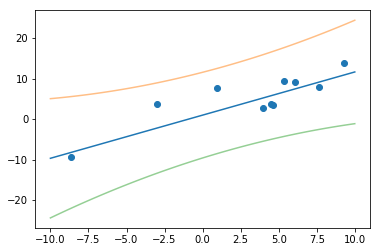

In [7]:
#############
##   PD    ##
#############
def pred_distribution(mu, phi, a, lambda_):
    mu_pred  = np.matmul(mu.T, phi)
    var_pred = (1/a) + np.matmul(np.matmul(phi.T, inv(lambda_)), phi)
    return np.asscalar(mu_pred), np.asscalar(var_pred)

mu_pred, var_pred = pred_distribution(mu_posterior, phi, a, lambda_posterior)
xs = np.linspace(-10, 10, 100)
ys_mu = []
ys_std_up = []
ys_std_down = []
for x in xs:
    phi = x2phi(x, num_basis)
    mu_pred, var_pred = pred_distribution(mu_posterior, phi, a, lambda_posterior)
    ys_mu.append(mu_pred)
    ys_std_up.append(mu_pred+var_pred)
    ys_std_down.append(mu_pred-var_pred)
plt.scatter(points_xs, points_ys)
plt.plot(xs, ys_mu)
plt.plot(xs, ys_std_up, alpha=0.5)
plt.plot(xs, ys_std_down, alpha=0.5)
plt.show()